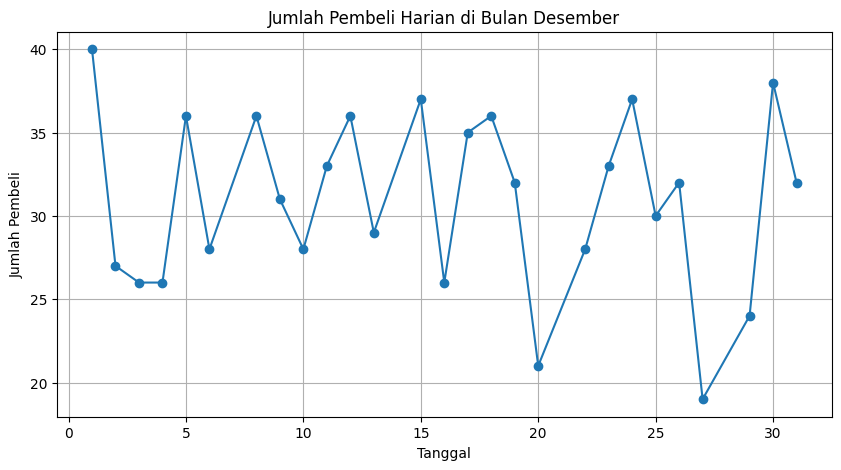

In [44]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('retail_raw_reduced.csv')

# Mengubah kolom order_date menjadi tipe data datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Mengambil data untuk bulan Desember
df_december = df[df['order_date'].dt.month == 12]

# Menghitung jumlah unique customers per tanggal
daily_customers = df_december.groupby(df_december['order_date'].dt.day)['customer_id'].nunique()

# Mengatur ukuran figure
plt.figure(figsize=(10, 5))

# Membuat line chart
plt.plot(daily_customers.index, daily_customers.values, marker='o', linestyle='-')

# Memberikan judul dan label pada sumbu-sumbu
plt.title('Jumlah Pembeli Harian di Bulan Desember')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pembeli')

# Menampilkan grid
plt.grid(True)

# Menampilkan line chart
plt.show()

In [136]:
# Memfilter data untuk bulan Desember
data_desember_2019 = df[(df['order_date'].dt.year == 2019) & (df['order_date'].dt.month == 12)]

# Menghitung total kuantitas terjual per brand
total_quantity_per_brand = data_desember_2019.groupby('brand')['quantity'].sum().reset_index()

# Mengurutkan brand berdasarkan total kuantitas terjual secara menurun
data_top5brand_dec = total_quantity_per_brand.nlargest(5, 'quantity')

# Menampilkan list dengan format yang diminta
print("5 Brand Penjualan Tertinggi pada Bulan Desember:")
for index, row in data_top5brand_dec.iterrows():
    print(f"{row['brand']}")

5 Brand Penjualan Tertinggi pada Bulan Desember:
BRAND_S
BRAND_P
BRAND_R
BRAND_C
BRAND_A


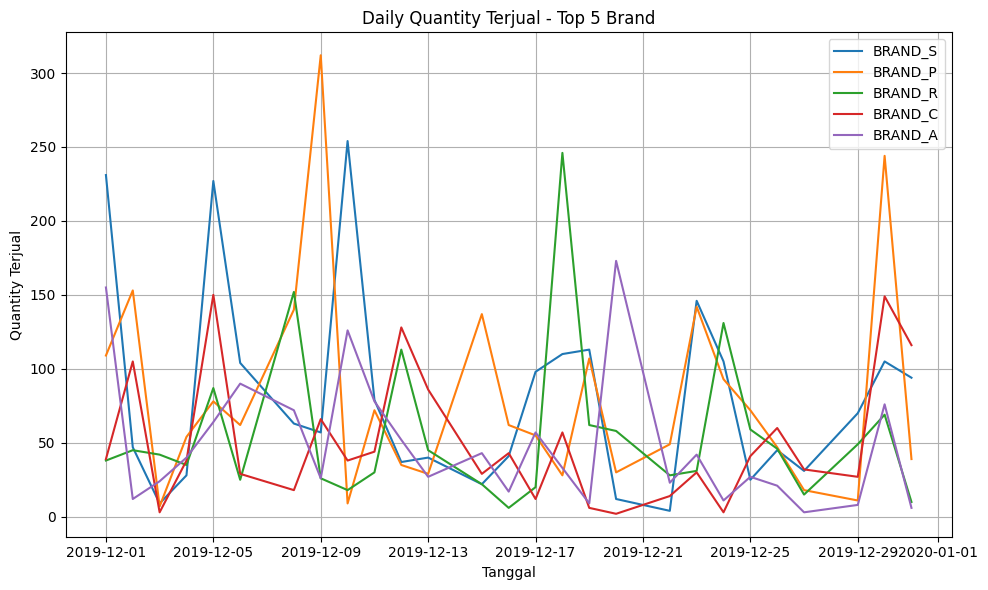

In [141]:
# Mengurutkan brand berdasarkan total kuantitas terjual secara menurun
top_5_brand = total_quantity_per_brand.groupby('brand')['quantity'].sum().nlargest(5).index

# Membuat multi-line chart
fig, ax = plt.subplots(figsize=(10, 6))

for brand in top_5_brand:
    brand_data = data_top5brand_dec[data_top5brand_dec['brand'] == brand]
    ax.plot(brand_data['order_date'], brand_data['quantity'], label=brand)

# Konfigurasi plot
ax.set_title('Daily Quantity Terjual - Top 5 Brand')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Quantity Terjual')
ax.legend()
ax.grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-111-ee7267449b5c>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(jumlah_product_per_brand['brand'], rotation=45)


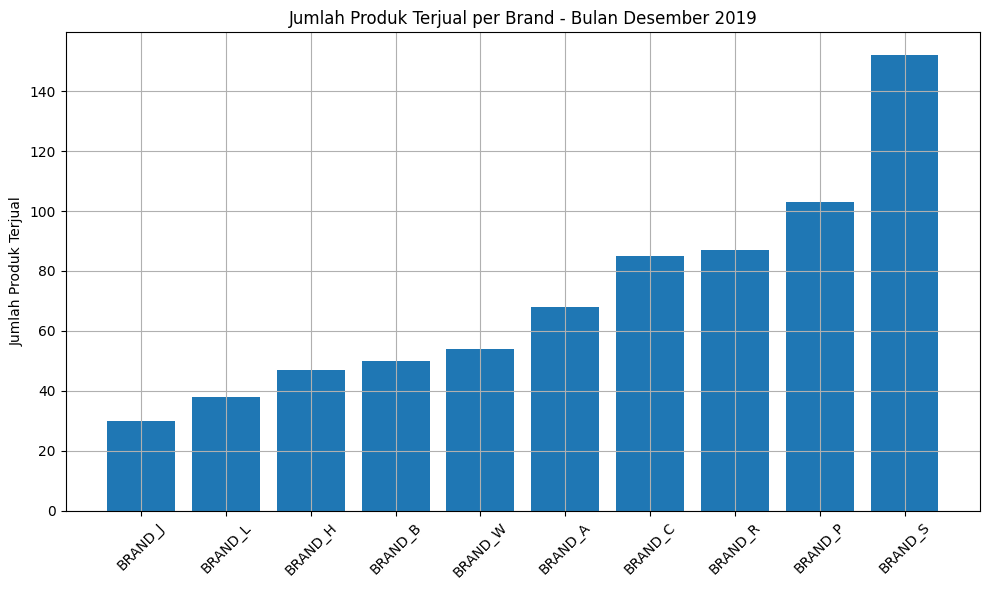

In [111]:
# Menghitung jumlah product terjual per brand
jumlah_product_per_brand = data_desember_2019.groupby('brand')['product_id'].nunique().reset_index()

# Mengurutkan brand berdasarkan jumlah product terjual secara menaik
jumlah_product_per_brand = jumlah_product_per_brand.sort_values('product_id')

# Membuat bar chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(jumlah_product_per_brand['brand'], jumlah_product_per_brand['product_id'])

# Konfigurasi plot
ax.set_title('Jumlah Produk Terjual per Brand - Bulan Desember 2019')
ax.set_ylabel('Jumlah Produk Terjual')
ax.set_xticklabels(jumlah_product_per_brand['brand'], rotation=45)
ax.grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-114-71db01891e56>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(jumlah_product_per_brand['brand'], rotation=90)


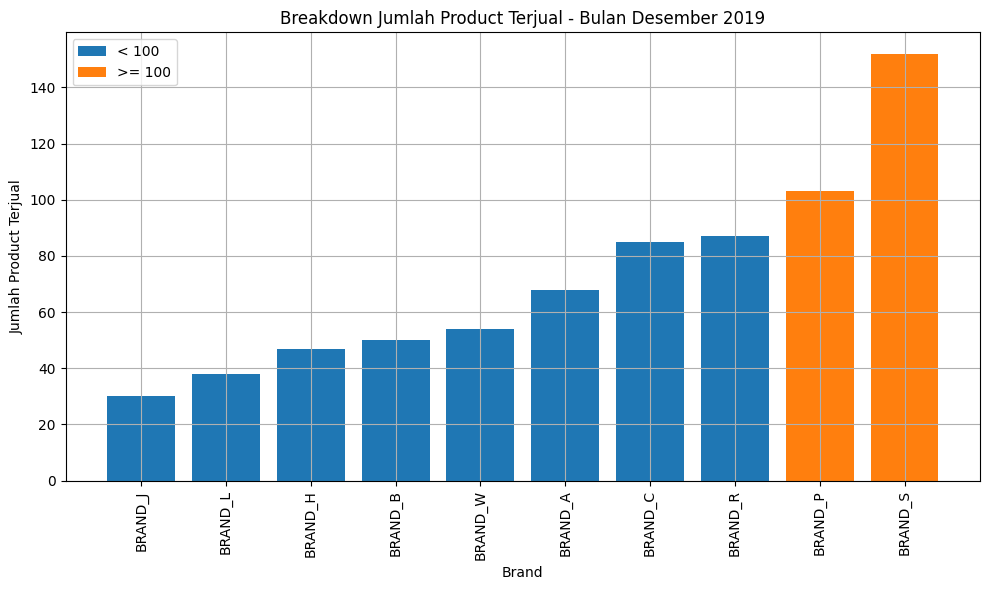

In [114]:
# Mengurutkan brand berdasarkan jumlah product terjual secara menaik
jumlah_product_per_brand = jumlah_product_per_brand.sort_values('product_id')

# Memisahkan data product yang terjual di atas atau sama dengan 100 dan di bawah 100
product_above_100 = jumlah_product_per_brand[jumlah_product_per_brand['product_id'] >= 100]
product_below_100 = jumlah_product_per_brand[jumlah_product_per_brand['product_id'] < 100]

# Membuat stacked chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(product_below_100['brand'], product_below_100['product_id'], label='< 100')
ax.bar(product_above_100['brand'], product_above_100['product_id'], label='>= 100')

# Konfigurasi plot
ax.set_title('Breakdown Jumlah Product Terjual - Bulan Desember 2019')
ax.set_xlabel('Brand')
ax.set_ylabel('Jumlah Product Terjual')
ax.set_xticklabels(jumlah_product_per_brand['brand'], rotation=90)
ax.legend()
ax.grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [140]:
# Mengambil data hanya untuk top 5 brand
top_5_brand = ['Brand A', 'Brand B', 'Brand C', 'Brand D', 'Brand E']
data_top_5_brand = data_penjualan[data_penjualan['brand'].isin(top_5_brand)]

# Menghitung median harga untuk setiap product_id
median_harga_per_product = data_top_5_brand.groupby('product_id')['harga'].median()

# Membuat histogram
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(median_harga_per_product, bins=10, edgecolor='black')

# Konfigurasi plot
ax.set_title('Distribusi Harga Produk - Top 5 Brand')
ax.set_xlabel('Harga')
ax.set_ylabel('Frekuensi')

# Menampilkan plot
plt.tight_layout()
plt.show()


KeyError: ignored